In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from auxiliary import plot_boundary, plot_svm_margins

sns.set()

# Ejercicio Clase 3 SVM

## Red Wine Quality
Vamos a trabajar con el dataset de calidad de vinos tintos de Kaggle [RedWineQuality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009).
Primero analicemos los datos:

### Análisis de Datos

In [2]:
# Cargamos el dataset
df_wine = pd.read_csv("./datasets/winequality-red.csv")

In [3]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df_wine.head(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Todos los datos son numéricos y estamos frente a un problema de regresión o de clasificación multi-clase.

No hay valores nulos así que no tendremos que buscar maneras de rellenar el dataset.

Del describe parece que no hay muchos datos **outliers**, me quedo con la idea de chequear los datos del azúcar y el total de dióxido sulfúrico que pueden mostrar algunos valores alejados de la media.

Veamos la correlación entre features:

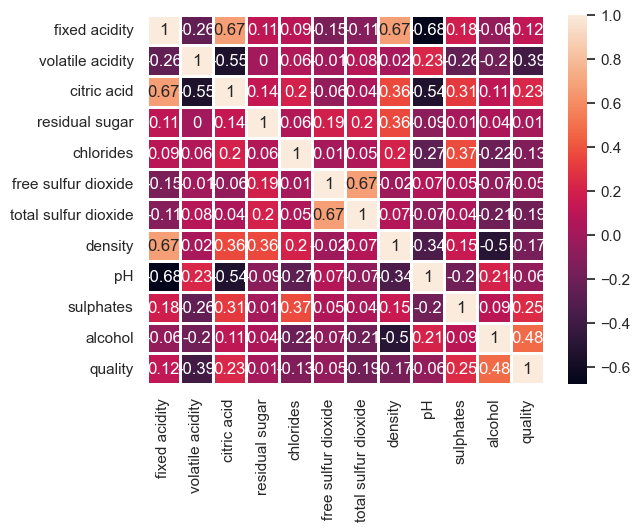

In [6]:
#Correlacion entre las features
correlacion_profit = df_wine.corr().round(2)
sns.heatmap(data=correlacion_profit, linewidths=1, annot=True)
plt.show()

Hay algunas features que presentan correlación, pero ninguna muy importante:

*   *citric acid*, con *fixed acidity* y *volatile acidity*, lo cual tiene sentido porque están midiendo elementos relacionados químicamente [Wine acid](https://agrovin.com/en/techniques-for-correcting-wine-acidity/#:~:text=Fixed%20acidity%20is%20the%20set,of%20tartaric%20acid%20per%20litre.)
*   *densidad* y *pH* también se ve su relación con la *fixed acidity*
*   *free sulfur dioxide* y *total sulfur dioxide* que por obvias razones presentan alta correlación, e incluso sorprende que no sea tanta.

Por lo tanto con estos resultados no se me da ninguna razón para quitar features del estudio.

Viendo particularmente la relación con la *quality* se observa que lo que presenta una relación mayor positiva es el *alcohol* y mayor negativa es el *volatile acidity* (lo cual tiene sentido leyendo el link anterior)

In [7]:
wine_info = df_wine.iloc[:, :-1].columns.tolist()
wine_columns = df_wine.columns.to_list()

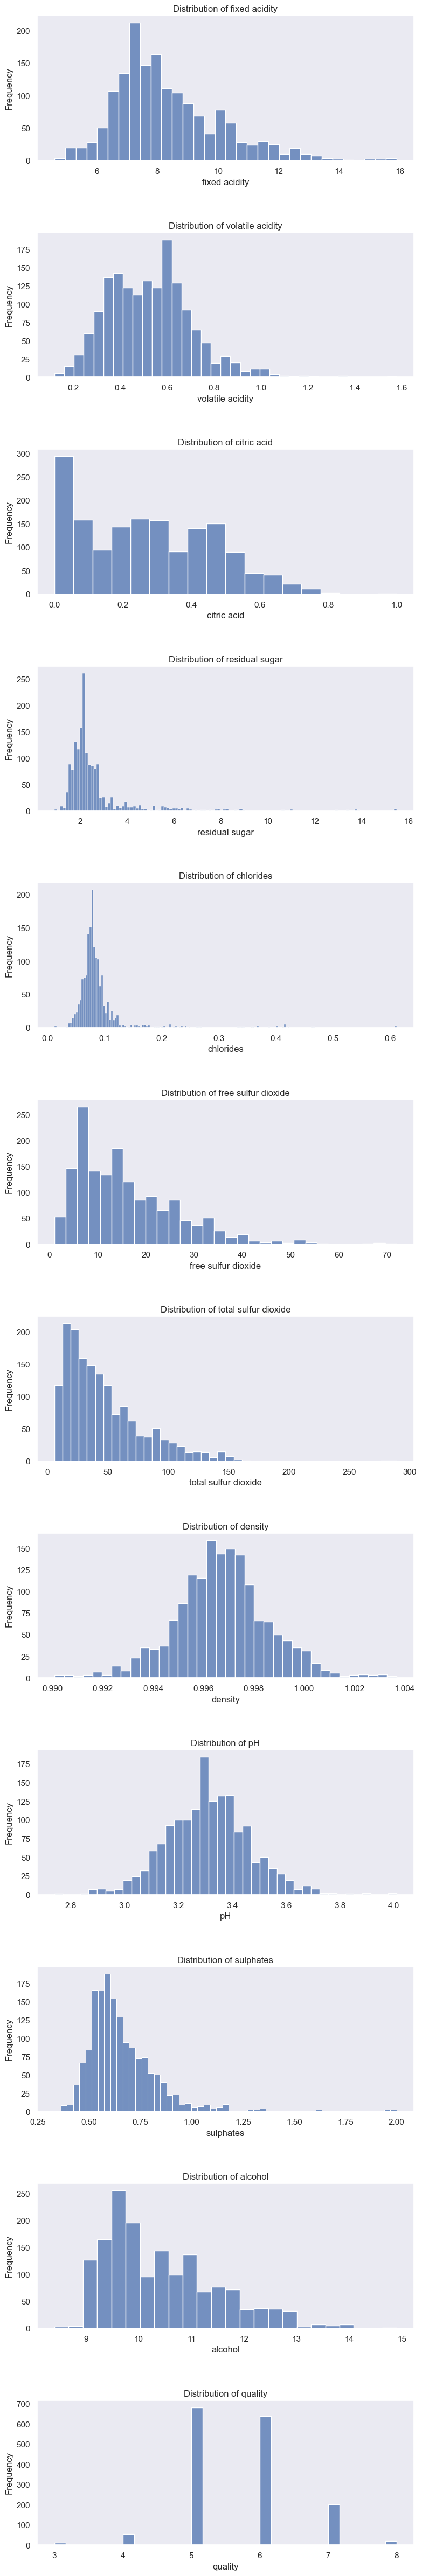

In [8]:
sns.set_theme(style="dark")

# Configurar la figura para tener múltiples subplots
fig, axes = plt.subplots(nrows=len(wine_columns), ncols=1, figsize=(8, len(wine_columns) * 4))

for ax, wine_column in zip(axes, wine_columns):
    sns.histplot(df_wine, x=wine_column, ax=ax)
    ax.set_title(f'Distribution of {wine_column}')
    ax.set_xlabel(wine_column)
    ax.set_ylabel('Frequency')
    
# Ajustar el layout para que no haya solapamiento y dejar espacio entre las figuras
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Ajusta hspace según sea necesario para más espacio vertical

In [9]:
def count_value(df, column, value):
    return df[df[column] == value].shape[0]

for i in range(1, 11):
    quality_number= count_value(df_wine, 'quality', i)
    print(f"Number of rows with quality {i}: {quality_number}. In percentage: {quality_number/1599}")

Number of rows with quality 1: 0. In percentage: 0.0
Number of rows with quality 2: 0. In percentage: 0.0
Number of rows with quality 3: 10. In percentage: 0.006253908692933083
Number of rows with quality 4: 53. In percentage: 0.03314571607254534
Number of rows with quality 5: 681. In percentage: 0.425891181988743
Number of rows with quality 6: 638. In percentage: 0.3989993746091307
Number of rows with quality 7: 199. In percentage: 0.12445278298936835
Number of rows with quality 8: 18. In percentage: 0.01125703564727955
Number of rows with quality 9: 0. In percentage: 0.0
Number of rows with quality 10: 0. In percentage: 0.0


Dos puntos interesantes sobre esto:

* *residual sugar* y *chlorides* parecen ser los dos features que presentan elementos outliers, por lo que limpiaremos elementos no representativos.
*  Realmente el target no esta nada bien distribuido, la calidad es del 1 al 10, pero no existen datos para la mitad de ellos. El 80% de los datos se distribuyen en calidades de 5 o 6, un 12% para 7, y 3,8,4 representan un 5%.

Dados los datos parecería ser que si yo obligo a que mi predicción siempre sea 5, 6 o 7, ya debería de tener poco error.

In [10]:
df_wine.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

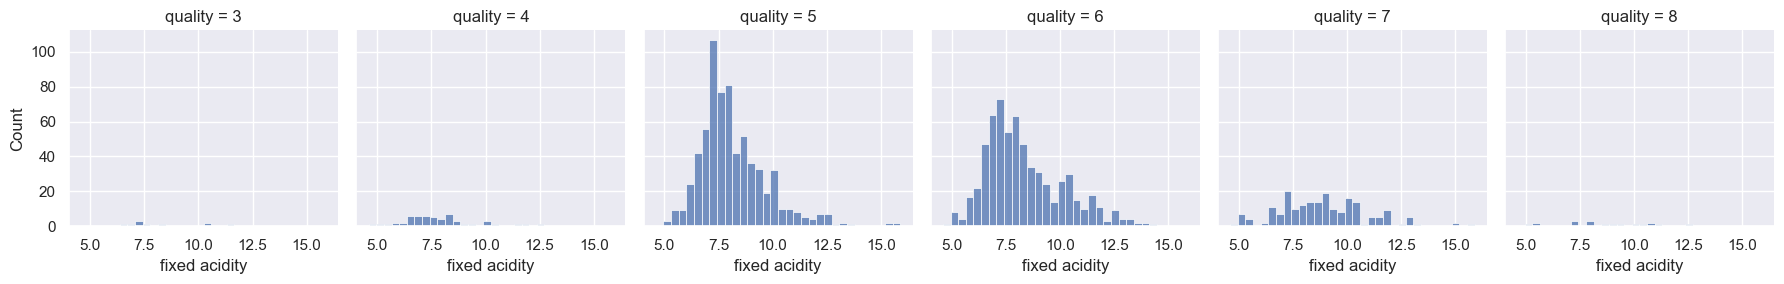

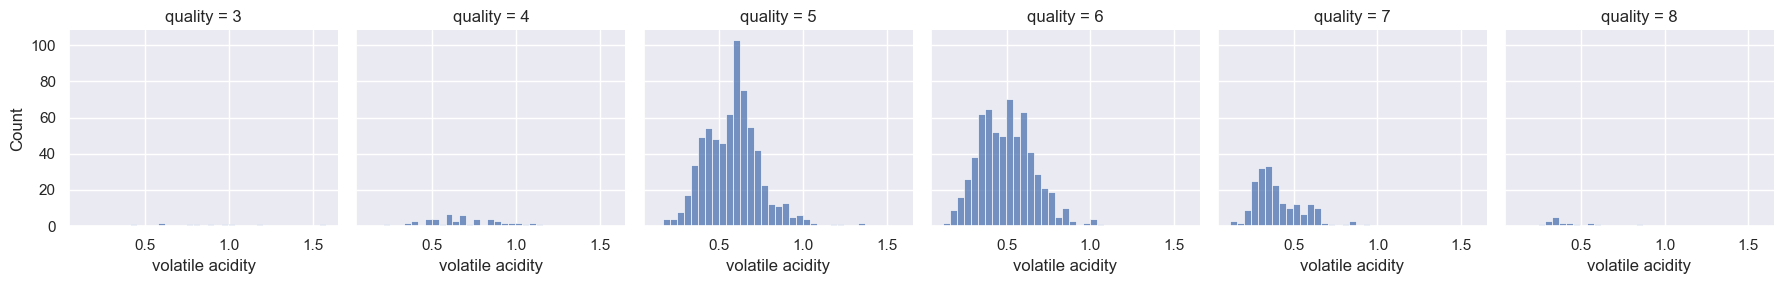

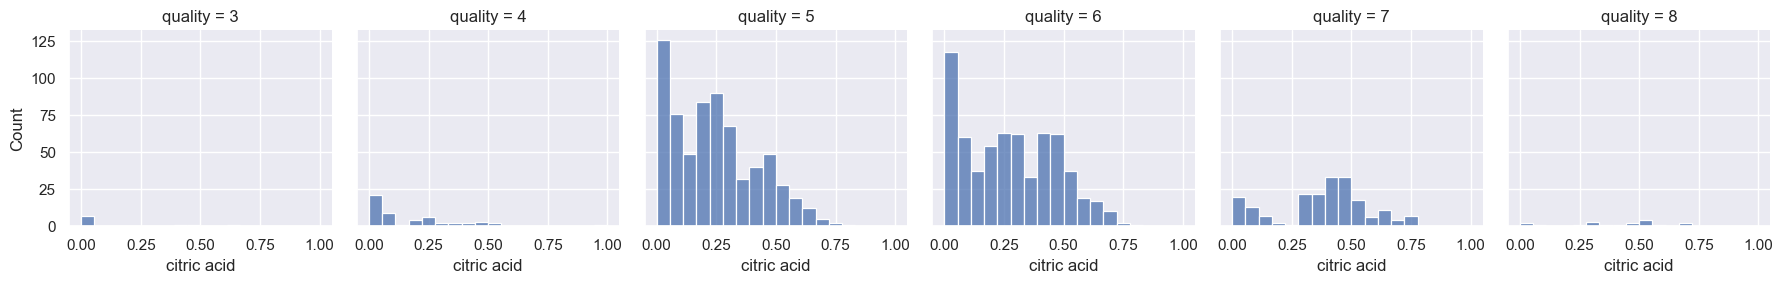

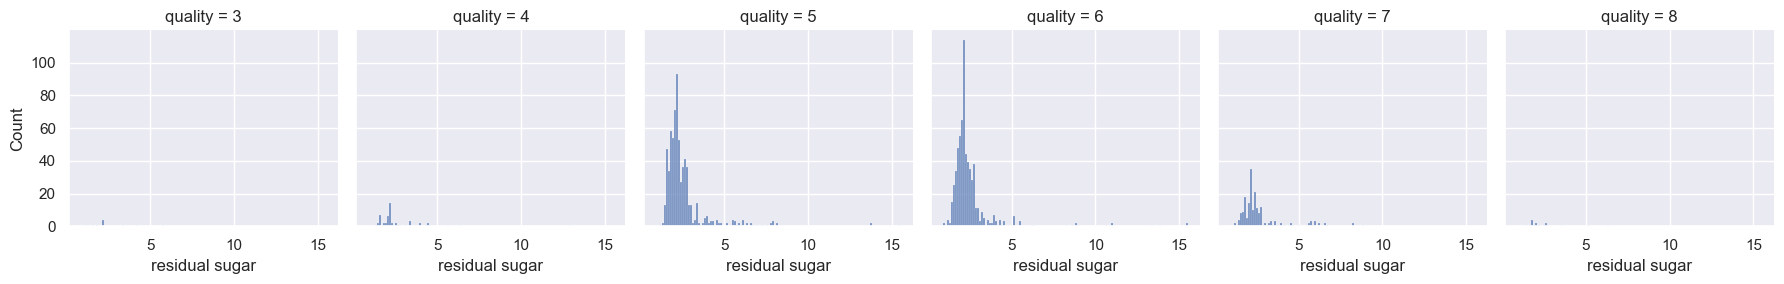

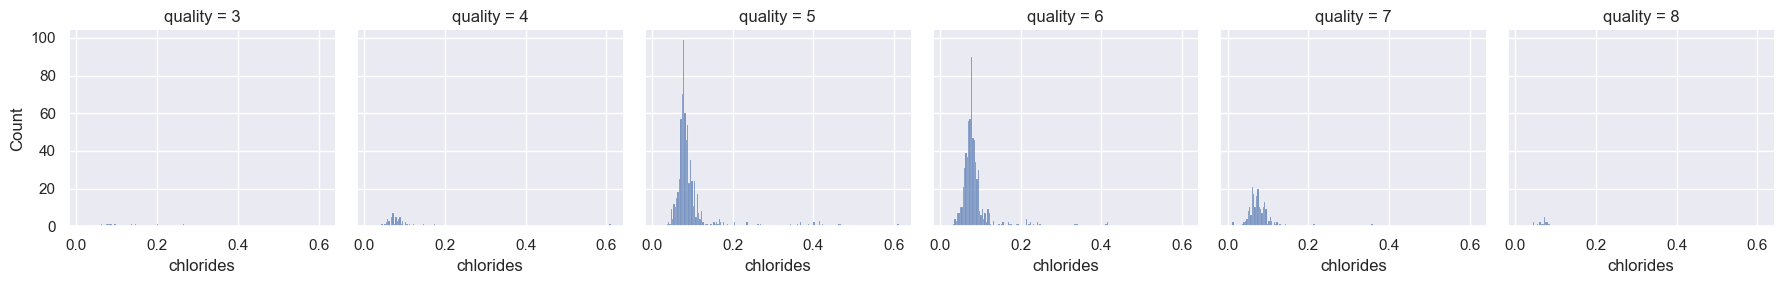

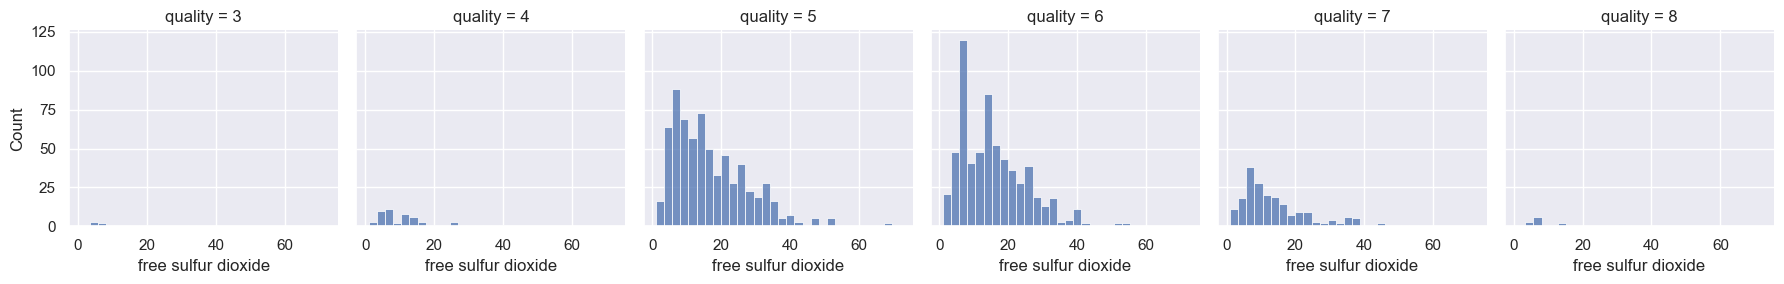

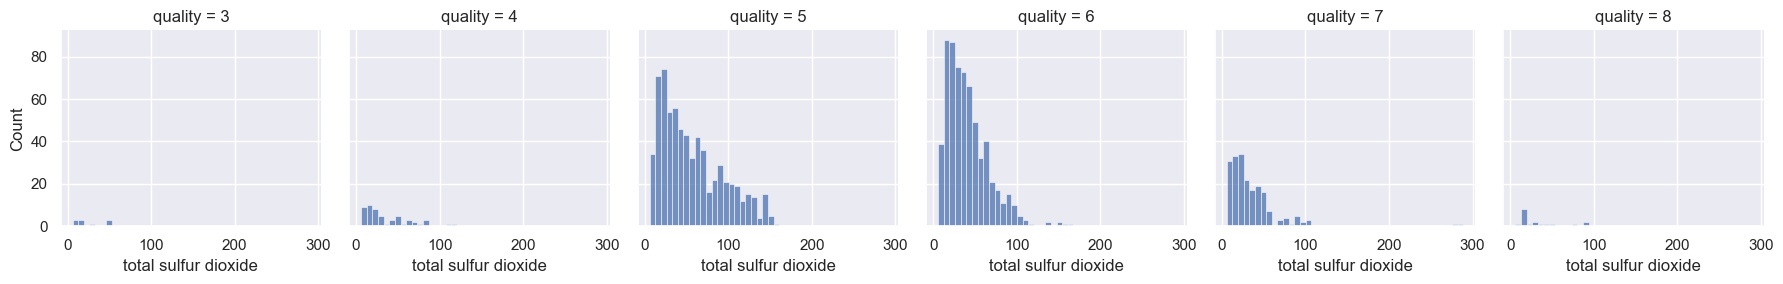

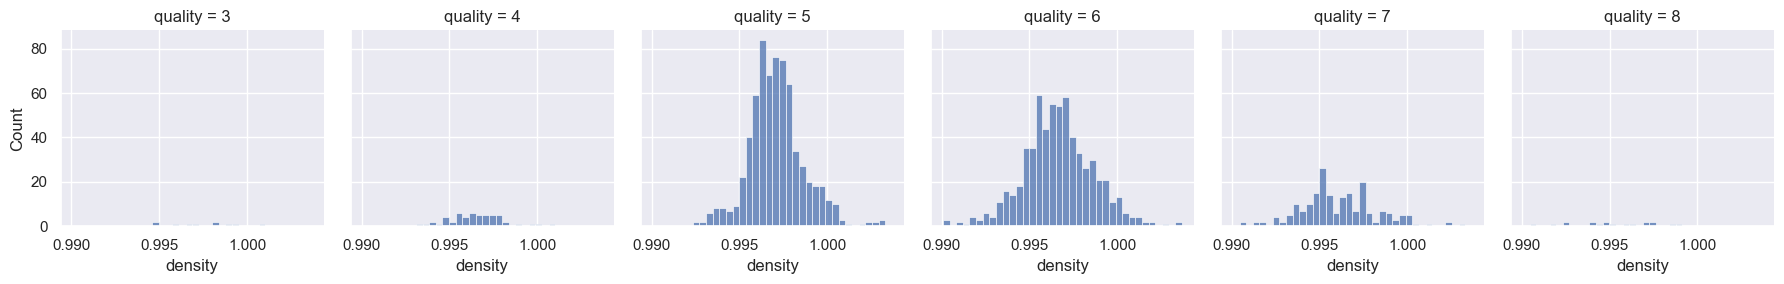

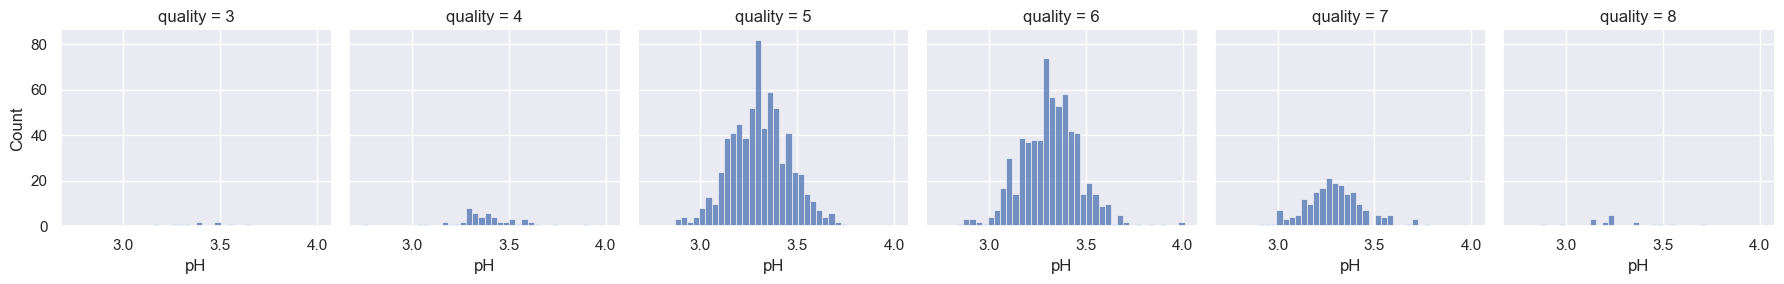

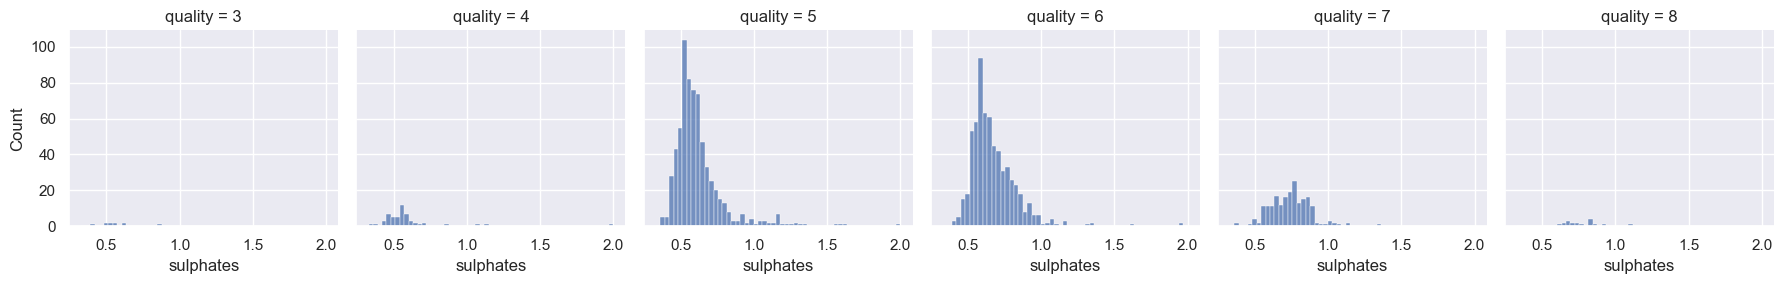

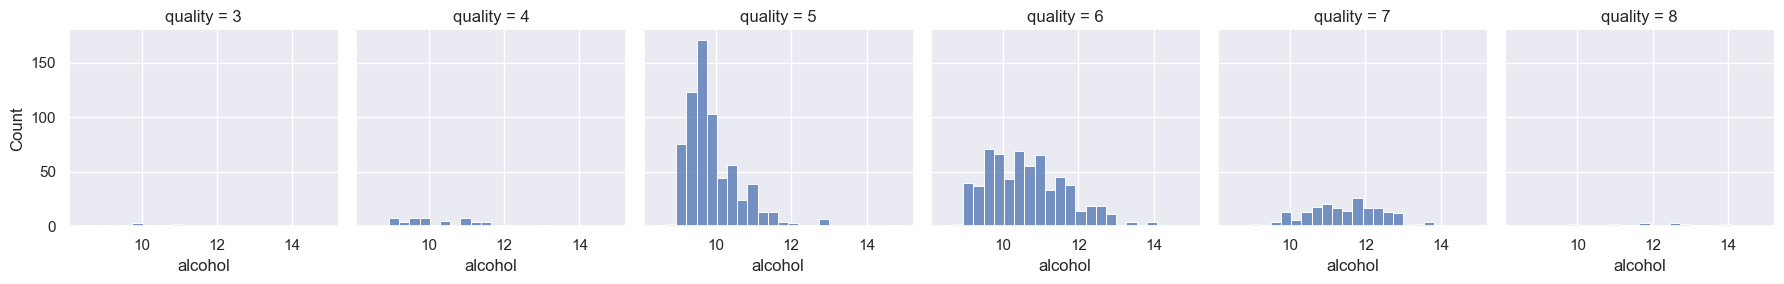

In [11]:
sns.set_theme(style="darkgrid")
for wine_column in wine_info:
    sns.displot(
        df_wine, x=wine_column, col="quality",
        height=3, facet_kws=dict(margin_titles=True),
    )

Estos ultimos gráficos muestran como es la distribución de cada feature en función de la calidad. Se puede observar que en la mayoría la distribución se parece a su distribución general, pero hay excepciones:

* Las tres mediciones de acidez parecen mover su media con el cambio de calidad del vino
* *density* parece achatar la curva
* El más claro que presenta un cambio total en la estructura de la distribución es el alcohol, donde para calidades más altas se observa un cambio claro de la distribución.

De esta manera defino dos caminos a seguir: el estudio de la predicción sin limpieza de datos, y el estudio de datos quedandome solo con estos últimos features mencionados.



### Limpieza de datos

Hagamos un boxplot para elegir los datos a quitar *residual sugar* y *chlorides* 

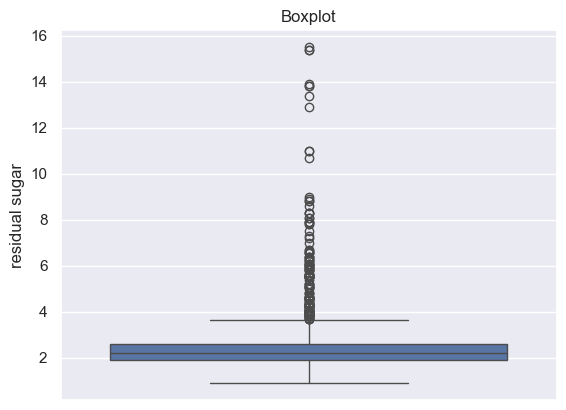

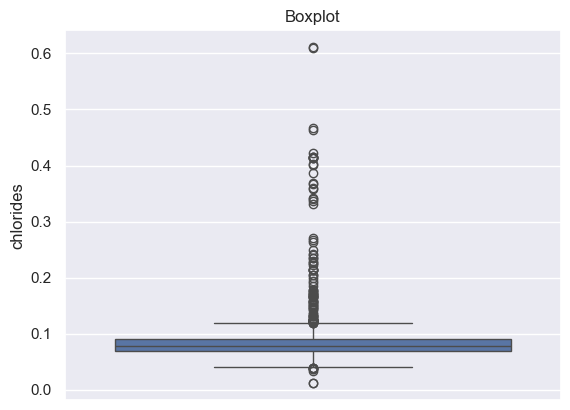

In [12]:
#Creamos el boxplot
for feature in ["residual sugar", "chlorides"]:
    sns.boxplot(data=df_wine[feature])
    plt.title('Boxplot')
    plt.show()

In [13]:
# Función para contar outliers de una columna
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Contar outliers para cada característica
outliers_residual_sugar = count_outliers(df_wine, 'residual sugar')
outliers_chlorides = count_outliers(df_wine, 'chlorides')

print(f'Outliers in Residual Sugar: {outliers_residual_sugar}')
print(f'Outliers in Chlorides: {outliers_chlorides}')

Outliers in Residual Sugar: 155
Outliers in Chlorides: 112


Vamos a quitar estos datos del dataset.

In [14]:
# Función para calcular los límites de outliers y eliminar los outliers de una columna
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Eliminar outliers para cada característica
df_wine_cleaned = df_wine.copy()
df_wine_cleaned = remove_outliers(df_wine_cleaned, 'residual sugar')
df_wine_cleaned = remove_outliers(df_wine_cleaned, 'chlorides')

df_wine_cleaned.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,8.256619,0.522898,0.256866,2.187173,0.078122,15.723635,45.282723,0.996599,3.319678,0.645729,10.401720,5.644727
std,1.667222,0.175781,0.185626,0.445837,0.014128,9.712720,30.677006,0.001768,0.149213,0.152025,1.035011,0.787365
min,4.600000,0.120000,0.000000,0.900000,0.042000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.069000,8.000000,23.000000,0.995500,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.240000,2.100000,0.078000,14.000000,37.000000,0.996600,3.320000,0.620000,10.100000,6.000000
75%,9.100000,0.630000,0.400000,2.500000,0.086000,21.000000,60.000000,0.997610,3.410000,0.710000,11.000000,6.000000
max,15.000000,1.330000,0.750000,3.600000,0.117000,57.000000,165.000000,1.001400,3.900000,1.980000,14.000000,8.000000


En total se limpiaron del dataset 262 observaciones, que reflejan un 17% del total del datos. Es un número alto y podemos estar perdiendo mucha información, sin embargo a modo de ejercicio tomemoslo.

### Clasificación

El último ejercicio a realizar en este dataset es intentar estudiarlo como un proyecto de clasificación. Dada la distribución heterogénea de los datos generaré tres clases: "good" si es mayor a 6 su calificación, "mid" si es igual a 6 y "bad" si es menor a 6.

In [15]:
# Función para categorizar la columna "quality"
def categorize_quality(quality):
    if quality > 6:
        return 'good'
    elif quality == 6:
        return 'mid'
    elif quality < 6:
        return 'bad'
    else:
        return 'other'

# Aplicar la función para crear una nueva columna "quality_category"
df_wine_class = df_wine.copy()
df_wine_class['quality_class'] = df_wine_class['quality'].apply(categorize_quality)

In [16]:
#Uso el método que cree antes para contar la cantidad de observaciones pertenecientes a cada caso
for i in ["good", "mid", "bad"]:
    quality_number= count_value(df_wine_class, 'quality_class', i)
    print(f"Number of rows with quality {i}: {quality_number}. In percentage: {quality_number/1599}")

Number of rows with quality good: 217. In percentage: 0.1357098186366479
Number of rows with quality mid: 638. In percentage: 0.3989993746091307
Number of rows with quality bad: 744. In percentage: 0.4652908067542214


Me interesa ver los dos features que mejor *"clasificaban"* la quality ploteados y definido por esta última clasificación.

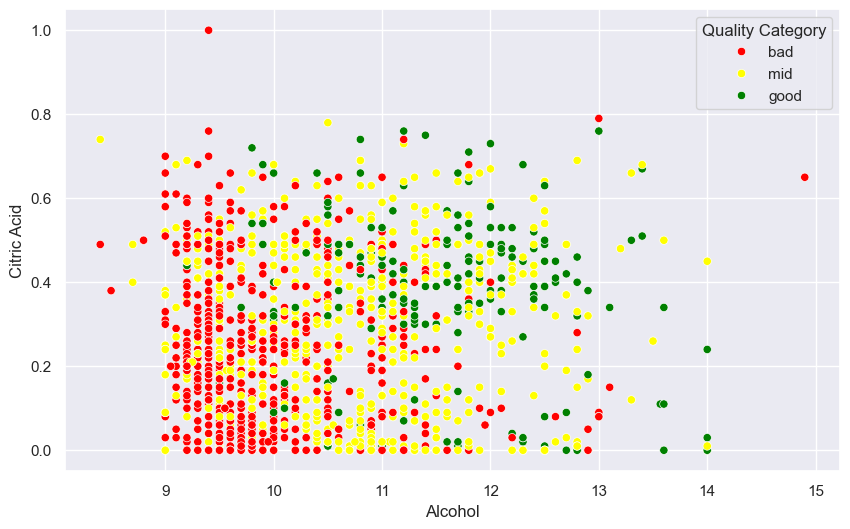

In [17]:
# Crear el scatter plot
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(data=df_wine_class, x='alcohol', y='citric acid', hue='quality_class', palette={'good': 'green', 'mid': 'yellow', 'bad': 'red'})
plt.xlabel('Alcohol')
plt.ylabel('Citric Acid')
plt.legend(title='Quality Category')


Si bien no hay una separación clara, si se logra ver que la concentración de rojos están en el caso de un alcohol y citric acid bajo, y en esa zona no hay ningún verde. Yendo a los más general podemos generar un pairplot.

In [18]:
# Crear el pair plot
sns.pairplot(df_wine_class, hue='quality_class', palette={'good': 'green', 'mid': 'yellow', 'bad': 'red'})
plt.suptitle('Pair Plot con Categoría de Calidad', y=1.02)
plt.show()

KeyboardInterrupt: 

## Separación en train-test-split


### Datos sin limpiar

Obtenemos los arrays

In [19]:
X = df_wine.loc[:, wine_info].values
y = df_wine.loc[:, "quality"].values
y


array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

Separamos el dataset en entrenamiento y testeo

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Datos filtrados

In [28]:
X2 = df_wine_cleaned.drop(columns="quality").values
y2 = df_wine_cleaned.loc[:, "quality"].values


In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

sc_X = StandardScaler()
X_train2 = sc_X.fit_transform(X_train2)
X_test2 = sc_X.transform(X_test2)

### Modelo de clasificación

In [31]:
X3 = df_wine_class.drop(columns=["quality", "quality_class"]).values
y3 = df_wine_class.loc[:, "quality_class"].values


In [32]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

sc_X = StandardScaler()
X_train3 = sc_X.fit_transform(X_train3)
X_test3 = sc_X.transform(X_test3)

## Modelo SVR

Vamos a arrancar probando un modelo SVM de regresión

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svm_wine = SVR()

grid = GridSearchCV(svm_wine,
                    [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf", "sigmoid"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],
                    refit=True,
                    cv=5,
                    scoring='neg_mean_absolute_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 10, 100],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'gamma': [0.1, 0.5, 1, 2, 10, 100],
                          'kernel': ['rbf', 'sigmoid']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']}],
             scoring='neg_mean_absolute_error')

In [35]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Según esta busqueda el mejor modelo es uno con función radial.

Evaluemos este modelo con el set de testeo.

In [36]:
from sklearn.metrics import mean_absolute_error

svm_wine_best = grid.best_estimator_

y_pred = svm_wine_best.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"MAE de testeo fue: {mae}")

MAE de testeo fue: 0.45221043568028063


Para tener algún modelo de referencia usemos Ridge.

In [37]:
from sklearn.linear_model import Ridge

ridge_wine = Ridge()

grid = GridSearchCV(ridge_wine,
                    {"alpha": np.linspace(0, 20, 1000)},
                    refit=True,
                    cv=5,
                    scoring='neg_mean_absolute_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.        ,  0.02002002,  0.04004004,  0.06006006,  0.08008008,
        0.1001001 ,  0.12012012,  0.14014014,  0.16016016,  0.18018018,
        0.2002002 ,  0.22022022,  0.24024024,  0.26026026,  0.28028028,
        0.3003003 ,  0.32032032,  0.34034034,  0.36036036,  0.38038038,
        0.4004004 ,  0.42042042,  0.44044044,  0.46046046,  0.48048048,
        0.5005005 ,  0.52052052,  0.5...
       19.41941942, 19.43943944, 19.45945946, 19.47947948, 19.4994995 ,
       19.51951952, 19.53953954, 19.55955956, 19.57957958, 19.5995996 ,
       19.61961962, 19.63963964, 19.65965966, 19.67967968, 19.6996997 ,
       19.71971972, 19.73973974, 19.75975976, 19.77977978, 19.7997998 ,
       19.81981982, 19.83983984, 19.85985986, 19.87987988, 19.8998999 ,
       19.91991992, 19.93993994, 19.95995996, 19.97997998, 20.        ])},
             scoring='neg_mean_absolute_error')

In [38]:
grid.best_params_

{'alpha': 3.6436436436436437}

In [39]:
ridge_wine = grid.best_estimator_

y_pred = ridge_wine.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"MAE de testeo fue: {mae}")

MAE de testeo fue: 0.5036367236674809


El modelo de SVM de regresión mejora en un 10% el error, aunque dada la escala de rango en donde se encuentra el target (de 3 a 8) es un error del 10% lo que parece alto. Incluso para el 90% de los datos que estan entre 5 y 7, tendriamos un error de casi el 20%.

Probemos con los datos filtrados.

In [40]:
svm_wine = SVR()

grid = GridSearchCV(svm_wine,
                    [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf", "sigmoid"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],
                    refit=True,
                    cv=5,
                    scoring='neg_mean_absolute_error')
grid.fit(X_train2,y_train2)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 10, 100],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'gamma': [0.1, 0.5, 1, 2, 10, 100],
                          'kernel': ['rbf', 'sigmoid']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']}],
             scoring='neg_mean_absolute_error')

In [41]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [42]:
svm_wine_best = grid.best_estimator_

y_pred2 = svm_wine_best.predict(X_test2)

mae = mean_absolute_error(y_test2, y_pred2)

print(f"MAE de testeo fue: {mae}")

MAE de testeo fue: 0.46776355849076623


Interesantemente, los mejores parametros para el SVR se compartieron en ambos casos (filtrado y sin filtrar), sin embargo el error de testeo fue mayor con los datos filtrados.

Esto se podría explicar porque viendo los histogramas por puntaje, el *residual sugar* y *chlorides* no impactaban de sobremanera en la clasificación, su distribución era siempre una normal sesgada a la izquierda. Entonces yo eliminé datos por un feature que no me aportaba al estudio, pero quizas esos mismos datos si me aportaban en alguno de los otros features (por ejemplo en alcohol).

La pregunta que me surge es: ¿Cómo estar seguro de cuando elimino outliers por un feature en particular, no este afectando al resultado general? ¿Habría que identificar outliers que lo sean en todos los features?

## Modelo SVM Multiclase

Vamos a entrenar el modelo con un kernel RBF y una estrategia one vs one

In [57]:
from sklearn.svm import SVC

svm_rbf_3 = SVC(kernel="rbf", C=1, gamma=0.1, decision_function_shape='ovo'); 
svm_rbf_3.fit(X_train3, y_train3)

SVC(C=1, decision_function_shape='ovo', gamma=0.1)

In [68]:
y_pred3 = svm_rbf_3.predict(X_test3)
y_pred_df = pd.DataFrame(y_pred3)
y_pred_df.value_counts()

bad     160
mid     137
good     23
Name: count, dtype: int64

HAgamos una busqueda

In [75]:
from sklearn.metrics import make_scorer, f1_score

svm_class = SVC()

# Definir el scorer personalizado para f1_score con average='weighted'
scorer = make_scorer(f1_score, average='weighted')

grid = GridSearchCV(svm_class,
                    [{"C": [0.01, 0.1, 1, 5, 10, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf"], "decision_function_shape": ["ovo", "ovr"]},
                    ],
                    refit=True,
                    cv=5,
                    scoring=scorer,
                    )
grid.fit(X_train3,y_train3)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 10, 100],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'gamma': [0.1, 0.5, 1, 2, 10, 100],
                          'kernel': ['rbf']}],
             scoring=make_scorer(f1_score, average=weighted))

In [76]:
grid.best_params_

{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 0.5, 'kernel': 'rbf'}

In [78]:
svm_class_best = grid.best_estimator_
y_pred3 = svm_class_best.predict(X_test3)

y_pred_df = pd.DataFrame(y_pred)
y_pred_df.value_counts()


bad     167
mid     126
good     27
Name: count, dtype: int64

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, log_loss
# Evaluar el modelo con las métricas relevantes
accuracy = accuracy_score(y_test3, y_pred3)
precision = precision_score(y_test3, y_pred3, average='weighted')
recall = recall_score(y_test3, y_pred3, average='weighted')
f1 = f1_score(y_test3, y_pred3, average='weighted')
cm = confusion_matrix(y_test3, y_pred3)
report = classification_report(y_test3, y_pred3, target_names=['bad', 'mid', 'good'])

# Imprimir las métricas
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{report}')

Accuracy: 0.63125
Precision: 0.6341072814688083
Recall: 0.63125
F1 Score: 0.6240201197686662
Confusion Matrix:
[[111   0  30]
 [  2  20  25]
 [ 54   7  71]]
Classification Report:
              precision    recall  f1-score   support

         bad       0.66      0.79      0.72       141
         mid       0.74      0.43      0.54        47
        good       0.56      0.54      0.55       132

    accuracy                           0.63       320
   macro avg       0.66      0.58      0.60       320
weighted avg       0.63      0.63      0.62       320



Es dificil de interpretar las métricas para un caso multi-variable. Al poner el Average "Weighted" lo que se hace es calcular la precisión para cada clase y hacer el promedio ponderado.

En general se puede concluir:

El modelo es bastante bueno en identificar la clase 'bad' con un recall alto, lo que significa que pocas instancias de 'bad' son clasificadas incorrectamente.

El modelo tiene dificultades significativas para identificar correctamente la clase 'mid', con un recall bajo y un F1-score relativamente bajo. Esto sugiere que el modelo confunde la clase 'mid' con 'bad' o 'good'.

El rendimiento del modelo es medio tirando a malo en la identificación de la clase 'good', con el punto que se la confunde con la clase 'mid' pero nunca con la 'bad'.

La precisión promedio macro y ponderada son moderadas, lo que indica que el modelo no tiene un rendimiento bueno en ninguna clase específica.

Lo que si no se me ocurre es de que manera poder comparar el modelo de regresión vs este de clasificación.

No supe hacer la visualización para una matriz de confusión de las que vimos en clase.

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=svm_class_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_class_best.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

TypeError: '<' not supported between instances of 'str' and 'int'